In [1]:
import pandas as pd

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# load the dataset
data=pd.read_csv('Attrition data.csv')
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
# Handling missing data
data = data.dropna()

In [6]:
#Remove duplicates
data = data.drop_duplicates()

In [7]:
data.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,36.926977,9.197907,2.913256,1.0,2.066977,65059.844186,2.690000,15.210698,8.0,...,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,1272.117692,9.146517,8.097059,1.024774,0.0,1.106633,47045.398914,2.495764,3.662777,0.0,...,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1110.750000,30.000000,2.000000,2.000000,1.0,1.000000,29260.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2215.500000,36.000000,7.000000,3.000000,1.0,2.000000,49360.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3314.250000,43.000000,14.000000,4.000000,1.0,3.000000,83802.500000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4409.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   BusinessTravel           4300 non-null   object 
 4   Department               4300 non-null   object 
 5   DistanceFromHome         4300 non-null   int64  
 6   Education                4300 non-null   int64  
 7   EducationField           4300 non-null   object 
 8   EmployeeCount            4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked       4300

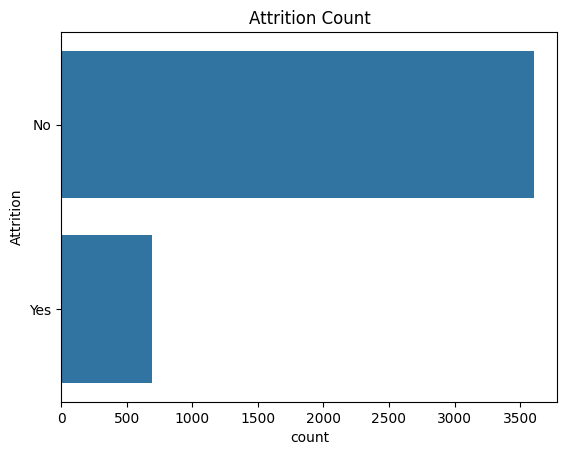

In [10]:
# Attrition distribution

sns.countplot(data['Attrition'])
plt.title('Attrition Count')
plt.show()

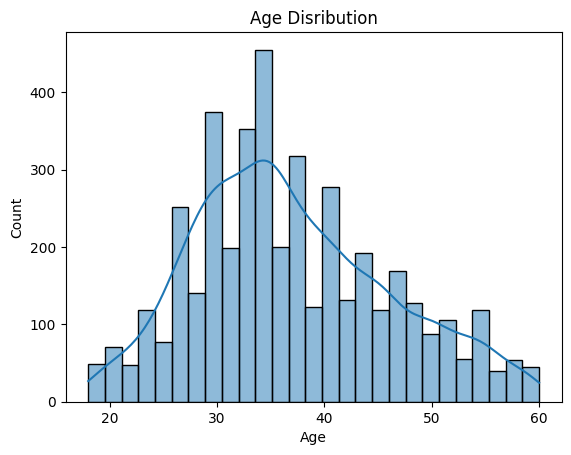

In [11]:
# Age distribution

sns.histplot(data['Age'], kde=True)
plt.title('Age Disribution')
plt.show()

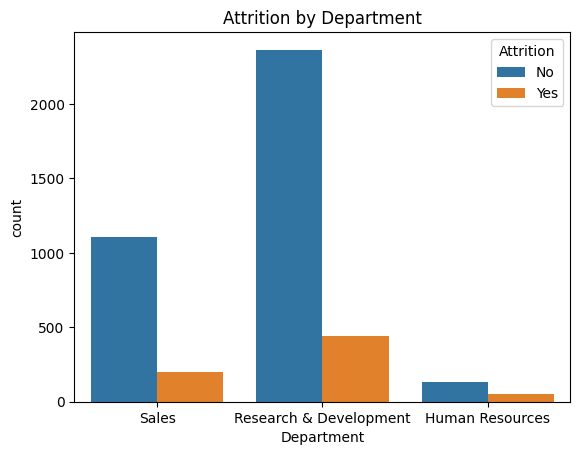

In [12]:
# Attrition by Department

sns.countplot(x='Department',hue='Attrition',data=data)
plt.title('Attrition by Department')
plt.show()

Data Modeling

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
# Define the features (X) and target variable (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns


numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_preprocessed = pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


Model Training 

In [17]:
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.85      0.99      0.91       717
         Yes       0.70      0.11      0.19       143

    accuracy                           0.84       860
   macro avg       0.77      0.55      0.55       860
weighted avg       0.82      0.84      0.79       860

[[710   7]
 [127  16]]
